In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, MaxPool2D, RandomFlip, RandomZoom, RandomRotation, Rescaling, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import warnings
import os
import glob
import shutil
import random
import math
warnings.simplefilter(action='ignore', category=FutureWarning)

Move all the pictures out of their respective folders while renaming them

In [ ]:
for folder in os.listdir('flower_photos'):
    for i, file in enumerate(os.listdir('flower_photos/'+folder)):
        os.rename('flower_photos/'+folder+'/'+file, 'flower_photos/'+folder+str(i)+'.jpg')

Get the count of each type of flower

In [ ]:
daisy_count = len(glob.glob('daisy*'))
roses_count = len(glob.glob('roses*'))
dandelion_count = len(glob.glob('dandelion*'))
sunflowers_count = len(glob.glob('sunflowers*'))
tulips_count = len(glob.glob('tulips*'))

Create new tran, valid and test directories for each type of flower

In [ ]:
if os.path.isdir('train/daisy') is False:
  os.makedirs('train/daisy')
  os.makedirs('train/roses')
  os.makedirs('train/dandelion')
  os.makedirs('train/sunflowers')
  os.makedirs('train/tulips')
  os.makedirs('valid/daisy')
  os.makedirs('valid/roses')
  os.makedirs('valid/dandelion')
  os.makedirs('valid/sunflowers')
  os.makedirs('valid/tulips')
  os.makedirs('test/daisy')
  os.makedirs('test/roses')
  os.makedirs('test/dandelion')
  os.makedirs('test/sunflowers')
  os.makedirs('test/tulips')

  for c in random.sample(glob.glob('daisy*'), math.floor(daisy_count * 0.75 )):
    shutil.move(c, 'train/daisy/')
  for c in random.sample(glob.glob('roses*'), math.floor(roses_count * 0.75 )):
    shutil.move(c, 'train/roses/')
  for c in random.sample(glob.glob('dandelion*'), math.floor(dandelion_count * 0.75 )):
    shutil.move(c, 'train/dandelion/')
  for c in random.sample(glob.glob('sunflowers*'), math.floor(sunflowers_count * 0.75 )):
    shutil.move(c, 'train/sunflowers/')
  for c in random.sample(glob.glob('tulips*'), math.floor(tulips_count * 0.75 )):
    shutil.move(c, 'train/tulips/')

  for c in random.sample(glob.glob('daisy*'), math.floor(daisy_count * 0.15 )):
    shutil.move(c, 'valid/daisy/')
  for c in random.sample(glob.glob('roses*'), math.floor(roses_count * 0.15 )):
    shutil.move(c, 'valid/roses/')
  for c in random.sample(glob.glob('dandelion*'), math.floor(dandelion_count * 0.15 )):
    shutil.move(c, 'valid/dandelion/')
  for c in random.sample(glob.glob('sunflowers*'), math.floor(sunflowers_count * 0.15 )):
    shutil.move(c, 'valid/sunflowers/')
  for c in random.sample(glob.glob('tulips*'), math.floor(tulips_count * 0.15 )):
    shutil.move(c, 'valid/tulips/')

  for c in random.sample(glob.glob('daisy*'), math.floor(daisy_count * 0.10 )):
    shutil.move(c, 'test/daisy/')
  for c in random.sample(glob.glob('roses*'), math.floor(roses_count * 0.10 )):
    shutil.move(c, 'test/roses/')
  for c in random.sample(glob.glob('dandelion*'), math.floor(dandelion_count * 0.10 )):
    shutil.move(c, 'test/dandelion/')
  for c in random.sample(glob.glob('sunflowers*'), math.floor(sunflowers_count * 0.10 )):
    shutil.move(c, 'test/sunflowers/')
  for c in random.sample(glob.glob('tulips*'), math.floor(tulips_count * 0.10 )):
    shutil.move(c, 'test/tulips/')

In [3]:
os.chdir('drive/MyDrive')

Specify the train, valid and test paths

In [4]:
train_path = 'data/flower_photos/train'
valid_path = 'data/flower_photos/valid'
test_path = 'data/flower_photos/test'

Generate Batches with target size (224,224) to train our new model

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                  .flow_from_directory(directory=train_path, target_size=(224,224), classes=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'], batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                  .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'], batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                  .flow_from_directory(directory=test_path, target_size=(224,224), classes=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'], batch_size=32, shuffle=False)

Found 2697 images belonging to 5 classes.
Found 537 images belonging to 5 classes.
Found 358 images belonging to 5 classes.


I chose to use the transfer learning technique because it's the most effecient method

In [6]:
model_vgg16 = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 5s 0us/step


In [7]:
model = Sequential()
for layer in model_vgg16.layers[:-1]:
    model.add(layer)

In [8]:
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units = 5, activation='softmax'))

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
85/85 - 1390s - loss: 1.2197 - accuracy: 0.5677 - val_loss: 0.7760 - val_accuracy: 0.7039 - 1390s/epoch - 16s/step
Epoch 2/20
85/85 - 25s - loss: 0.6029 - accuracy: 0.7846 - val_loss: 0.5926 - val_accuracy: 0.7803 - 25s/epoch - 293ms/step
Epoch 3/20
85/85 - 25s - loss: 0.4767 - accuracy: 0.8242 - val_loss: 0.5217 - val_accuracy: 0.8045 - 25s/epoch - 294ms/step
Epoch 4/20
85/85 - 25s - loss: 0.4037 - accuracy: 0.8517 - val_loss: 0.4858 - val_accuracy: 0.8212 - 25s/epoch - 294ms/step
Epoch 5/20
85/85 - 25s - loss: 0.3589 - accuracy: 0.8736 - val_loss: 0.4670 - val_accuracy: 0.8287 - 25s/epoch - 295ms/step
Epoch 6/20
85/85 - 25s - loss: 0.3214 - accuracy: 0.8902 - val_loss: 0.4436 - val_accuracy: 0.8399 - 25s/epoch - 292ms/step
Epoch 7/20
85/85 - 25s - loss: 0.2934 - accuracy: 0.8962 - val_loss: 0.4358 - val_accuracy: 0.8361 - 25s/epoch - 294ms/step
Epoch 8/20
85/85 - 25s - loss: 0.2674 - accuracy: 0.9077 - val_loss: 0.4299 - val_accuracy: 0.8417 - 25s/epoch - 293ms/step
Epoch 

In [11]:
predictions = model.predict(x=test_batches, verbose=0)

Model Evaluation metrics

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [14]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, w/o normalization")

  thresh = cm.max() / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, w/o normalization


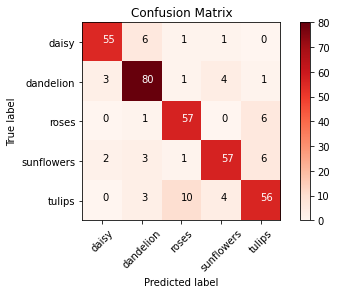

In [16]:
cm_plot_labels = ['daisy', 'dandelion', "roses", "sunflowers", 'tulips']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

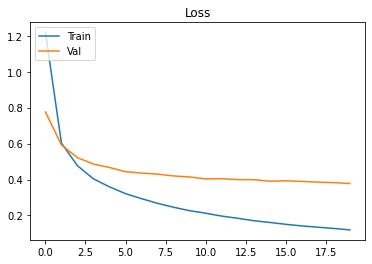

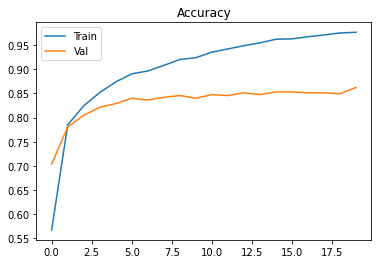

In [17]:
import matplotlib.pyplot as plt
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]
plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()




In [18]:
test_imgs, test_labels = next(test_batches)
loss, acc = model.evaluate(test_imgs, test_labels)
print("Test Loss", loss)
print("Test Accuracy", acc)

1/1 [==============================] - 1s 529ms/step - loss: 0.5771 - accuracy: 0.8125
Test Loss 0.577120840549469
Test Accuracy 0.8125


We reached an accuracy of 81% without overfitting

In [ ]:
os.chdir('../../')

'/content'

Model extraction

In [ ]:
model.save('custom_model')

INFO:tensorflow:Assets written to: custom_model/assets
